In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_large = pd.read_excel(r"C:\Users\udaya\Downloads\large_sales_data.xlsx")
df_large

,Product,Category,Sales,Month,Region
0,Keyboard,Accessories,180,November,East
1,Laptop,Electronics,640,November,West
2,Monitor,Electronics,4204,June,South
3,Monitor,Accessories,4341,February,North
4,Monitor,Electronics,336,February,North
...,...,...,...,...,...
995,Keyboard,Electronics,1213,March,South
996,Monitor,Accessories,3101,February,West
997,Smartphone,Accessories,3148,July,North
998,Smartphone,Electronics,4445,April,South


In [3]:
df_large.isnull().sum()

Product     0
Category    0
Sales       0
Month       0
Region      0
dtype: int64

In [4]:
df_large.drop_duplicates()

,Product,Category,Sales,Month,Region
0,Keyboard,Accessories,180,November,East
1,Laptop,Electronics,640,November,West
2,Monitor,Electronics,4204,June,South
3,Monitor,Accessories,4341,February,North
4,Monitor,Electronics,336,February,North
...,...,...,...,...,...
995,Keyboard,Electronics,1213,March,South
996,Monitor,Accessories,3101,February,West
997,Smartphone,Accessories,3148,July,North
998,Smartphone,Electronics,4445,April,South


In [5]:
df_large.describe()

,Sales
count,1000.000000
mean,2498.070000
std,1436.165592
min,100.000000
25%,1212.250000
50%,2509.500000
75%,3753.750000
max,4998.000000


In [6]:
df_large.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1000.0,2498.07,1436.165592,100.0,1212.25,2509.5,3753.75,4998.0


In [7]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   1000 non-null   object
 1   Category  1000 non-null   object
 2   Sales     1000 non-null   int64 
 3   Month     1000 non-null   object
 4   Region    1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [8]:
df_large.nunique()

Product       5
Category      2
Sales       906
Month        12
Region        4
dtype: int64

In [9]:
df_large['Region'].unique()

array(['East', 'West', 'South', 'North'], dtype=object)

In [10]:
df_large['Category'].unique()

array(['Accessories', 'Electronics'], dtype=object)

In [11]:
df_large.groupby('Category')['Sales'].sum()

Category
Accessories    1039175
Electronics    1458895
Name: Sales, dtype: int64

In [12]:
df_large.groupby('Region')['Sales'].sum()

Region
East     613788
North    645254
South    597074
West     641954
Name: Sales, dtype: int64

In [13]:
df_large.groupby('Month')['Sales'].sum()

Month
April        162303
August       231879
December     155706
February     223942
January      211813
July         223570
June         254108
March        182970
May          211221
November     204502
October      212701
September    223355
Name: Sales, dtype: int64

## Plot

### Bar

In [4]:
category_sales = df_large.groupby('Category')['Sales'].sum()
category_sales

Category
Accessories    1039175
Electronics    1458895
Name: Sales, dtype: int64

In [17]:
category_sales.index

Index(['Accessories', 'Electronics'], dtype='object', name='Category')

In [18]:
category_sales.values

array([1039175, 1458895], dtype=int64)

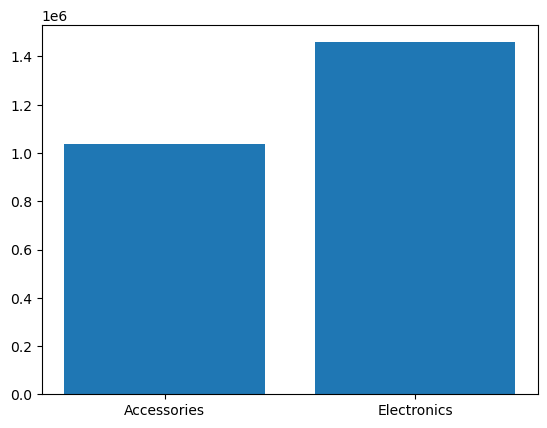

In [5]:
plt.bar(category_sales.index, category_sales.values)
plt.show()

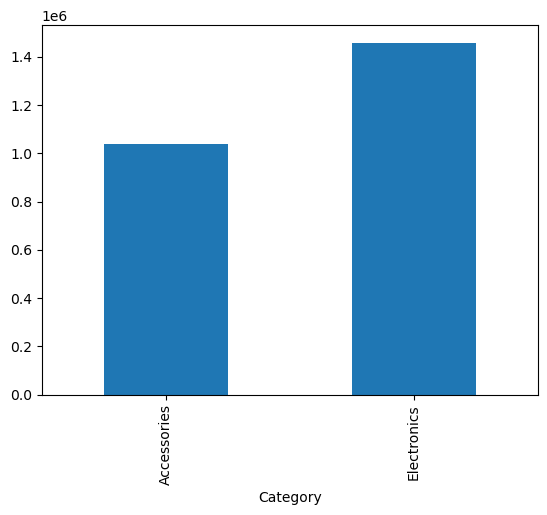

In [21]:
category_sales.plot(kind = 'bar')
plt.show()

## Pie

In [22]:
# Pie chart: Sales distribution by region
region_sales = df_large.groupby('Region')['Sales'].sum()
region_sales

Region
East     613788
North    645254
South    597074
West     641954
Name: Sales, dtype: int64

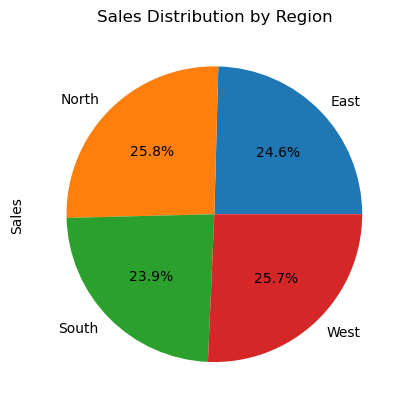

In [23]:
region_sales.plot(kind='pie',autopct='%1.1f%%', title='Sales Distribution by Region')
plt.show()

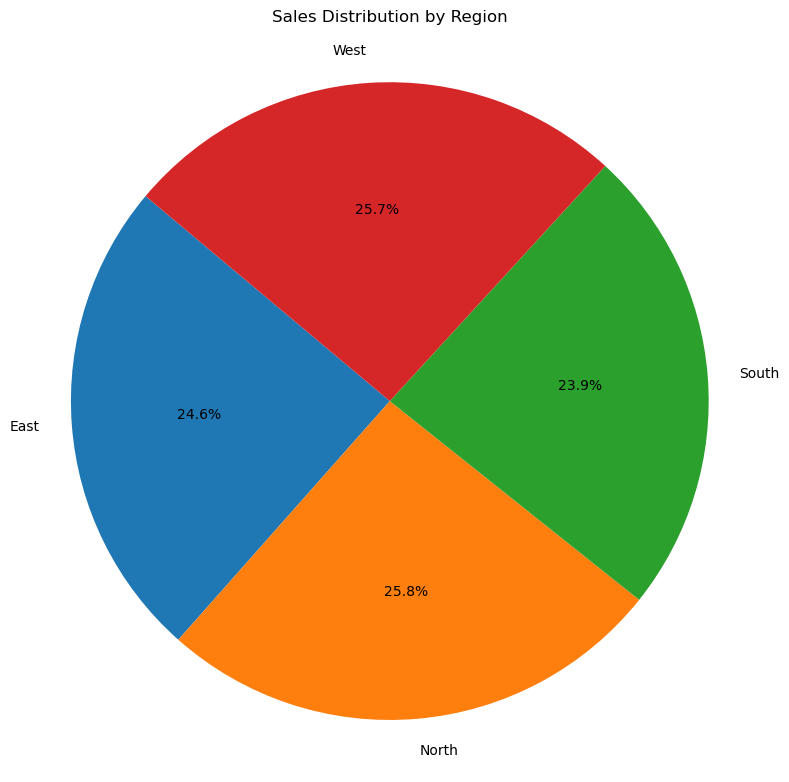

In [26]:
# Pie chart: Sales distribution by region
region_sales = df_large.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()

### histogram

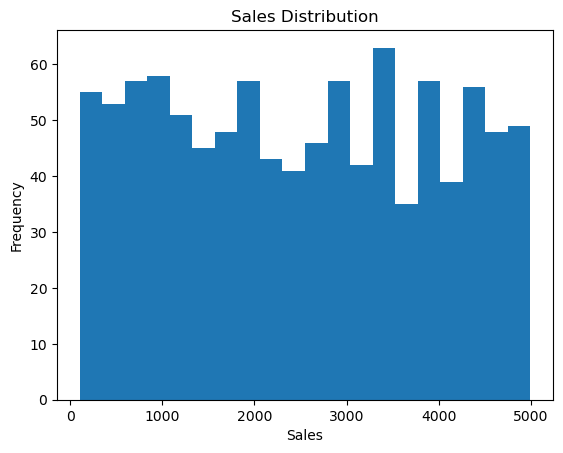

In [27]:
# Histogram: Distribution of sales values
df_large['Sales'].plot(kind='hist', bins=20, title='Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

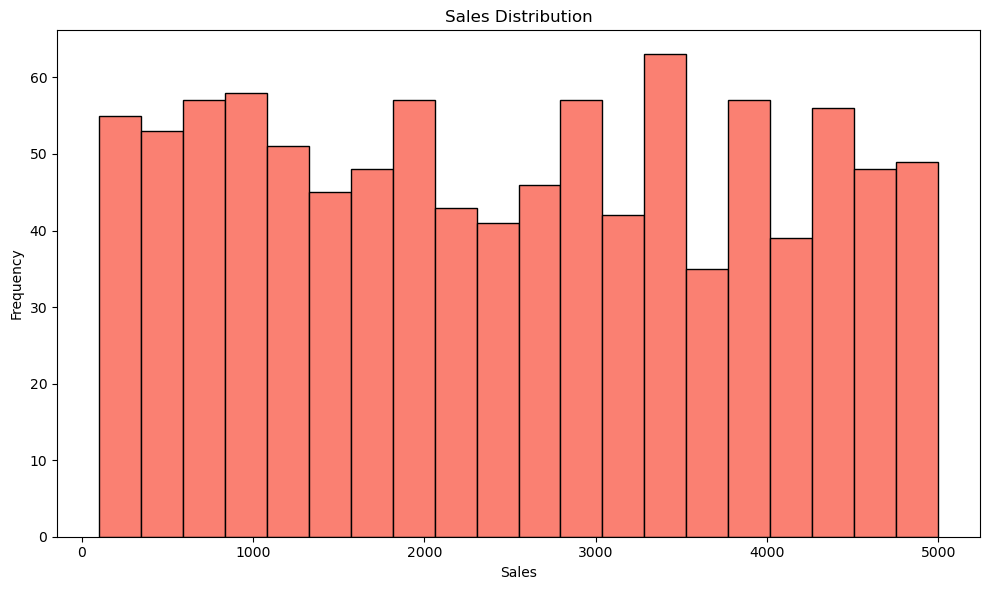

In [30]:
# Histogram: Distribution of sales values
plt.figure(figsize=(10, 6))
plt.hist(df_large['Sales'], bins=20, color='salmon', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Line chart

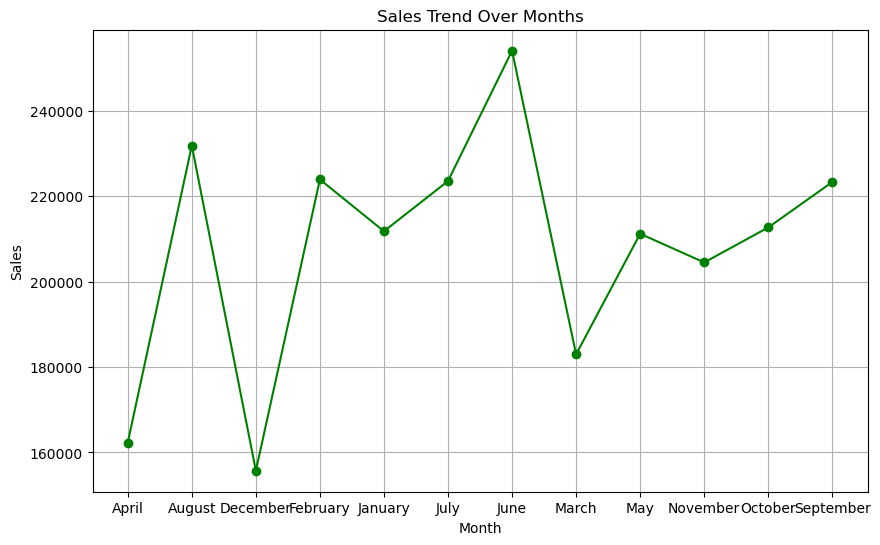

In [31]:
# Line chart: Sales trend over months
month_sales = df_large.groupby('Month')['Sales'].sum().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(month_sales.index, month_sales.values, marker='o', linestyle='-', color='green')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

plt.show()

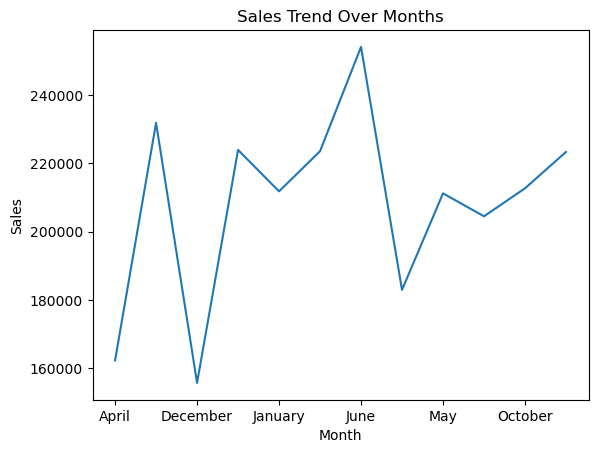

In [32]:

# Line chart: Sales trend over months (monthly total sales)
month_sales = df_large.groupby('Month')['Sales'].sum().sort_index()
month_sales.plot(kind='line', title='Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Box plot

<Figure size 1200x800 with 0 Axes>

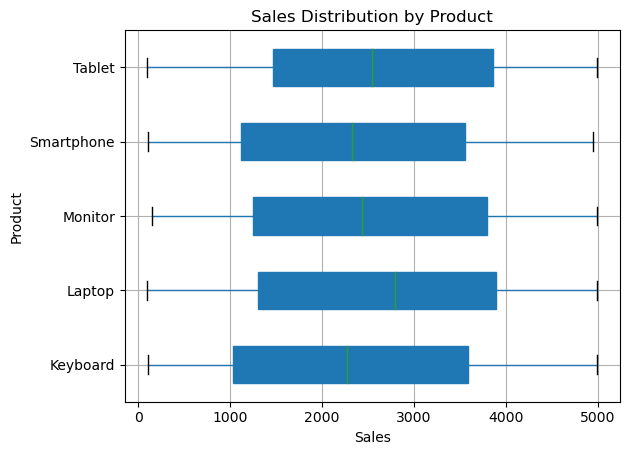

In [35]:
# Box plot: Sales distribution by product
plt.figure(figsize=(12, 8))
df_large.boxplot(column='Sales', by='Product', vert=False, patch_artist=True)
plt.title('Sales Distribution by Product')
plt.suptitle('')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

### Scatter plot

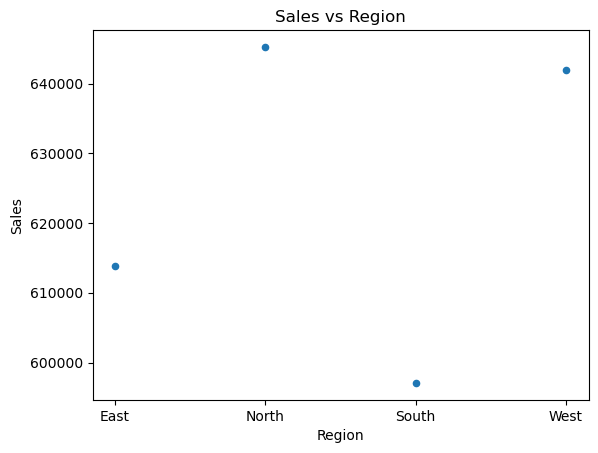

In [36]:
# Scatter plot: Sales vs. region (Scatter of Sales vs. Region)
region_sales = df_large.groupby('Region')['Sales'].sum().reset_index()
region_sales.plot(kind='scatter', x='Region', y='Sales', title='Sales vs Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


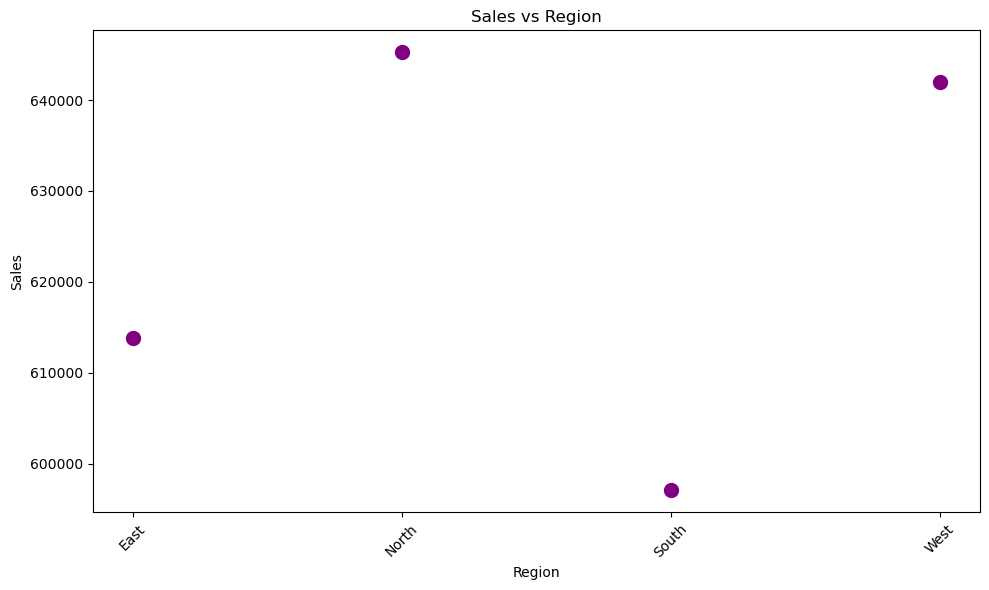

In [37]:
# Scatter plot: Sales vs. region
region_sales = df_large.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(region_sales['Region'], region_sales['Sales'], color='purple', s=100)
plt.title('Sales vs Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
